In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

data = pd.read_csv('dataset.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [15]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    
    model.add(Dense(16, input_dim=7, activation='relu'))    
    
    model.add(Dense(8, input_dim=7, activation='relu'))
    
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [16]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=30, batch_size=3, verbose=1)

In [25]:
data = data.drop("Serial No.",axis=1)
X=np.asarray(data.drop("Chance of Admit ",axis=1))
Y=np.asarray(data["Chance of Admit "])
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [26]:
X_train.shape

(320, 7)

In [33]:
history=estimator.fit(X_train,y_train)

Epoch 1/30
320/320 [==============================] - 0s 405us/step - loss: 0.0605
Epoch 2/30
320/320 [==============================] - 0s 206us/step - loss: 0.0124
Epoch 3/30
320/320 [==============================] - 0s 207us/step - loss: 0.0090
Epoch 4/30
320/320 [==============================] - 0s 208us/step - loss: 0.0074
Epoch 5/30
320/320 [==============================] - 0s 202us/step - loss: 0.0066
Epoch 6/30
320/320 [==============================] - 0s 206us/step - loss: 0.0060
Epoch 7/30
320/320 [==============================] - 0s 209us/step - loss: 0.0054
Epoch 8/30
320/320 [==============================] - 0s 208us/step - loss: 0.0051
Epoch 9/30
320/320 [==============================] - 0s 218us/step - loss: 0.0047
Epoch 10/30
320/320 [==============================] - 0s 213us/step - loss: 0.0046
Epoch 11/30
320/320 [==============================] - 0s 209us/step - loss: 0.0044
Epoch 12/30
320/320 [==============================] - 0s 208us/step - loss: 0.0044
E

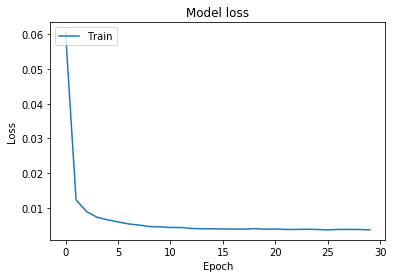

In [34]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()